# Loading Libraries

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from skimage.io import imshow
import glob
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV
from sklearn.multioutput import MultiOutputRegressor
from sklearn.ensemble import GradientBoostingRegressor
import warnings
warnings.filterwarnings('ignore')

# Loading Dataset

In [2]:
all_img = np.load(".../Faces_Dataset/Faces.npy")
all_ppl = np.load(".../Faces_Dataset/Face_train.npy")

# Performing EDA

In [3]:
print("Number of images in dataset: {} ".format(len(all_img)))
print("Number of people in dataset: {} ".format(len(np.unique(all_ppl))))
print("Fixed image size: {}x{}".format(all_img.shape[1],all_img.shape[2]))

Number of images in dataset: 400 
Number of people in dataset: 40 
Fixed image size: 64x64


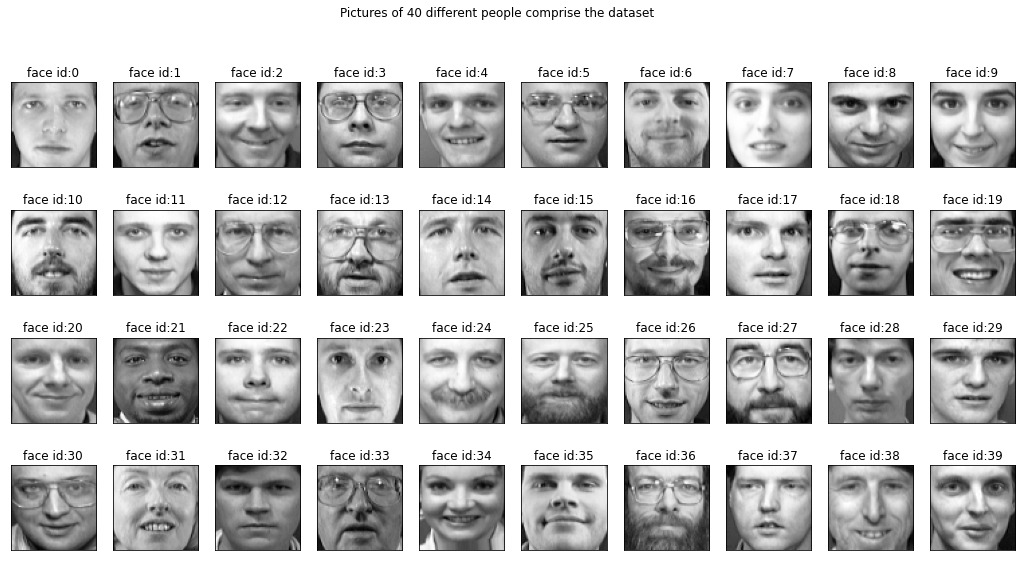

In [4]:
def people(imgs, nmbr):
    fig, axarr=plt.subplots(nrows=4, ncols=10, figsize=(18, 9))
    axarr=axarr.flatten()
    
    for nmbr in nmbr:
        image_index=nmbr*10
        axarr[nmbr].imshow(imgs[image_index], cmap='gray')
        axarr[nmbr].set_xticks([])
        axarr[nmbr].set_yticks([])
        axarr[nmbr].set_title("face id:{}".format(nmbr))
    plt.suptitle("Pictures of 40 different people comprise the dataset")
people(all_img, np.unique(all_ppl))

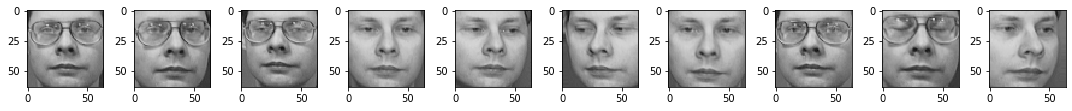

In [5]:
img_count = 10
plt.figure(figsize=(15,15))
for i in range(img_count):
    plt.subplot(1,10,i+1)
    x=all_img[i+30]
    imshow(x)
plt.show()

In [6]:
all_img_flt = all_img.reshape(all_img.shape[0],all_img.shape[1]*all_img.shape[2])
print(all_img_flt.shape)

(400, 4096)


In [7]:
all_ppl = np.load(".../Faces_Dataset/Face_train.npy")
print(all_ppl)

[ 0  0  0  0  0  0  0  0  0  0  1  1  1  1  1  1  1  1  1  1  2  2  2  2
  2  2  2  2  2  2  3  3  3  3  3  3  3  3  3  3  4  4  4  4  4  4  4  4
  4  4  5  5  5  5  5  5  5  5  5  5  6  6  6  6  6  6  6  6  6  6  7  7
  7  7  7  7  7  7  7  7  8  8  8  8  8  8  8  8  8  8  9  9  9  9  9  9
  9  9  9  9 10 10 10 10 10 10 10 10 10 10 11 11 11 11 11 11 11 11 11 11
 12 12 12 12 12 12 12 12 12 12 13 13 13 13 13 13 13 13 13 13 14 14 14 14
 14 14 14 14 14 14 15 15 15 15 15 15 15 15 15 15 16 16 16 16 16 16 16 16
 16 16 17 17 17 17 17 17 17 17 17 17 18 18 18 18 18 18 18 18 18 18 19 19
 19 19 19 19 19 19 19 19 20 20 20 20 20 20 20 20 20 20 21 21 21 21 21 21
 21 21 21 21 22 22 22 22 22 22 22 22 22 22 23 23 23 23 23 23 23 23 23 23
 24 24 24 24 24 24 24 24 24 24 25 25 25 25 25 25 25 25 25 25 26 26 26 26
 26 26 26 26 26 26 27 27 27 27 27 27 27 27 27 27 28 28 28 28 28 28 28 28
 28 28 29 29 29 29 29 29 29 29 29 29 30 30 30 30 30 30 30 30 30 30 31 31
 31 31 31 31 31 31 31 31 32 32 32 32 32 32 32 32 32

# Test & Train Data Split

In [8]:
train_imgs = all_img_flt[all_ppl<30] 
test_imgs = all_img_flt[all_ppl>=30] 
pics = test_imgs.shape[0]//10
pics

10

In [9]:
indvl = np.random.randint(0 , 100, size =pics) 
indvl

array([89, 64, 96, 12, 63, 49, 43, 84, 57, 77])

In [10]:
test_imgs.shape

(100, 4096)

# Model

In [11]:
test_imgs = test_imgs[indvl, :] 
test_imgs

array([[0.14876033, 0.20661157, 0.19421488, ..., 0.35123968, 0.35950413,
        0.3677686 ],
       [0.21900827, 0.28099173, 0.5371901 , ..., 0.20247933, 0.17768595,
        0.22727273],
       [0.3677686 , 0.3677686 , 0.35123968, ..., 0.4876033 , 0.5123967 ,
        0.5495868 ],
       ...,
       [0.3264463 , 0.1983471 , 0.21487603, ..., 0.3181818 , 0.25619835,
        0.11570248],
       [0.45454547, 0.5206612 , 0.57024795, ..., 0.43801653, 0.11983471,
        0.19008264],
       [0.28512397, 0.37603307, 0.45454547, ..., 0.338843  , 0.32231405,
        0.3305785 ]], dtype=float32)

In [12]:
pxls = all_img_flt.shape[1]
pxls

4096

In [13]:
X_train = train_imgs[:, :(pxls + 1) // 2]
y_train = train_imgs[:, pxls // 2:]

In [14]:
X_test = test_imgs[:, :(pxls + 1) // 2]
y_test = test_imgs[:, pxls // 2:]

In [15]:
class Downgrade():

  def __init__(self):
      pass

  def rndm_noise(self, img):

      lst = [self.gausian,
              self.snp,
              self.poisson,
              self.sp]
      rnd = np.random.randint(1, 2)
      for i in range(rnd):
          img = random.choice(lst)(img)
      return img

  def gausian(self, img):

      row, col, ch = img.shape
      mean = 0
      var = 0.1
      sigma = var ** 0.5
      gauss = np.random.normal(mean, sigma, (row, col, ch))
      #gauss = gauss[..., np.newaxis]
      #gauss = np.concatenate((gauss[:,np.newaxis], gauss[:,np.newaxis], gauss[:, np.newaxis]), axis=3)
      gauss = gauss.reshape(row, col, ch)
      noisy = img + gauss
      return noisy

  def snp(self, img):

      prb = np.random.uniform(0, 0.05)
      otpt = np.zeros(img.shape, dtype=np.uint8)
      thres = 1 - prb
      for i in range(img.shape[0]):
          for j in range(img.shape[1]):
              rnd = random.random()
              if rnd < prb:
                  otpt[i][j] = 0
              elif rnd > thres:
                  otpt[i][j] = 255
              else:
                  otpt[i][j] = img[i][j]
      return otpt

  def poisson(self, img):

      lam = np.random.randint(10, 40)
      noise = np.random.poisson(lam, img.shape)
      output = img + noise
      return output

  def sp(self, img):

      prob = np.random.uniform(0.01, 0.05)
      output = np.zeros(img.shape, np.uint8)
      thres = 1 - prob
      for i in range(img.shape[0]):
          for j in range(img.shape[1]):
              rnd = random.random()
              if rnd < prob:
                  output[i][j] = 128
                  for k in range(5):
                      output[i - k][j - k] = 128 + 10 * rnd
              else:
                  output[i][j] = img[i][j]
      return output

In [16]:
ESTIMATORS = {
    "Extra Trees": ExtraTreesRegressor(n_estimators=10, max_features=32,random_state=0),
    "KNN": KNeighborsRegressor(),                          
    "Linear Regression": LinearRegression(),
    "Ridge": RidgeCV(),
    "Multi_GBM" : MultiOutputRegressor(GradientBoostingRegressor(n_estimators=5))
}

In [17]:
y_test_predict = dict()
for name, estimator in ESTIMATORS.items():     
    estimator.fit(X_train, y_train)
    y_test_predict[name] = estimator.predict(X_test)

In [18]:
y_test_predict['Extra Trees'].shape

(10, 2048)

In [19]:
image_shape = (64, 64)

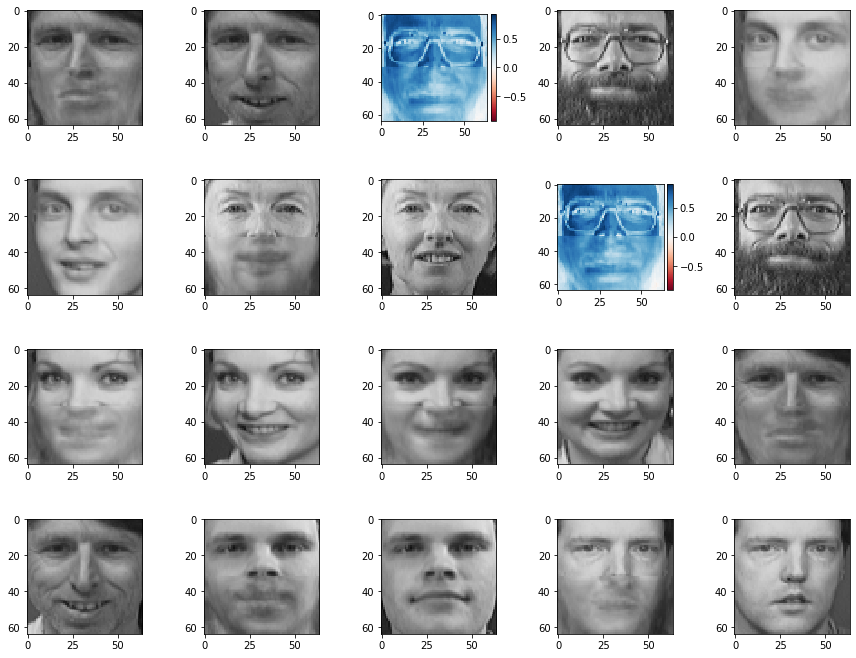

In [20]:
plt.figure(figsize=(12,12))
j = 0
for i in range(pics):
    actual_face = test_imgs[i].reshape(image_shape)
    completed_face = np.hstack((X_test[i], y_test_predict['Ridge'][i]))
    j = j+1
    plt.subplot(5,5,j)
    x = completed_face.reshape(image_shape)
    imshow(x)
    j = j+1
    plt.subplot(5,5,j)
    y = actual_face.reshape(image_shape)
    imshow(y)
  
plt.show()

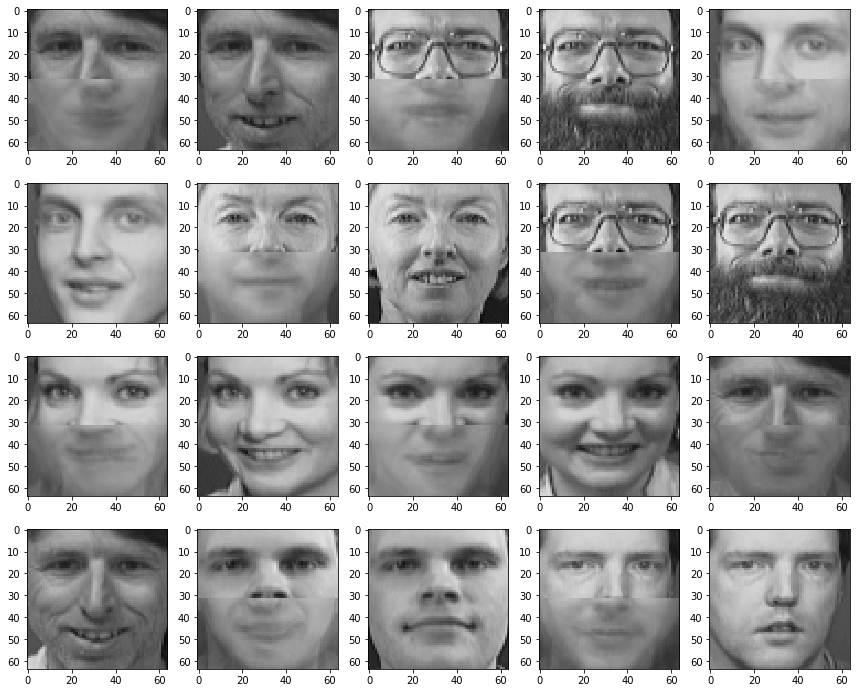

In [21]:
plt.figure(figsize=(12,12))
j = 0
for i in range(pics):
    actual_face =    test_imgs[i].reshape(image_shape)
    completed_face = np.hstack((X_test[i], y_test_predict['Extra Trees'][i]))
    j = j+1
    plt.subplot(5,5,j)
    x = completed_face.reshape(image_shape)
    imshow(x)
    j = j+1
    plt.subplot(5,5,j)
    y = actual_face.reshape(image_shape)
    imshow(y)
  
plt.show()

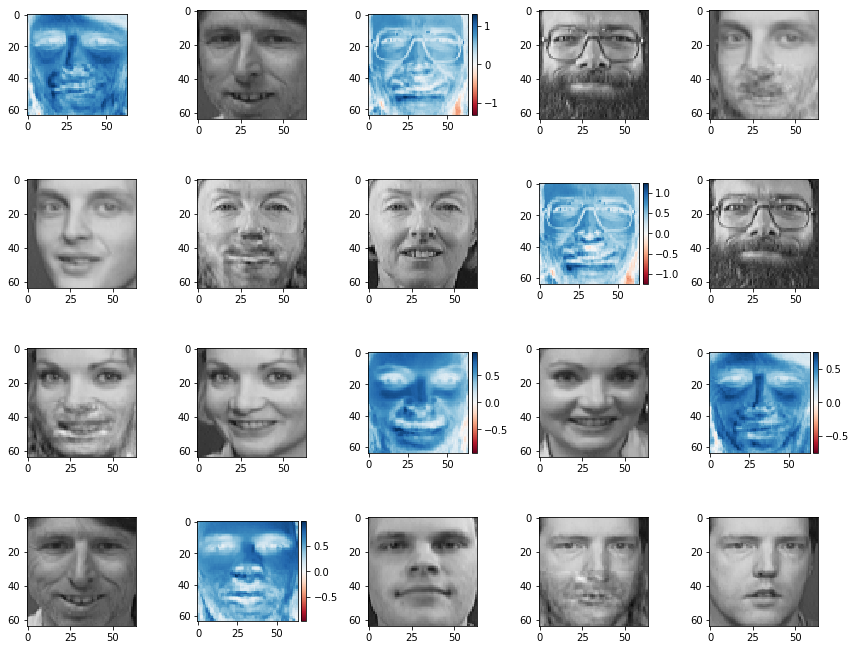

In [22]:
plt.figure(figsize=(12,12))
j = 0
for i in range(pics):
    actual_face =    test_imgs[i].reshape(image_shape)
    completed_face = np.hstack((X_test[i], y_test_predict['Linear Regression'][i]))
    j = j+1
    plt.subplot(5,5,j)
    x = completed_face.reshape(image_shape)
    imshow(x)
    j = j+1
    plt.subplot(5,5,j)
    y = actual_face
    imshow(y)
  
plt.show()

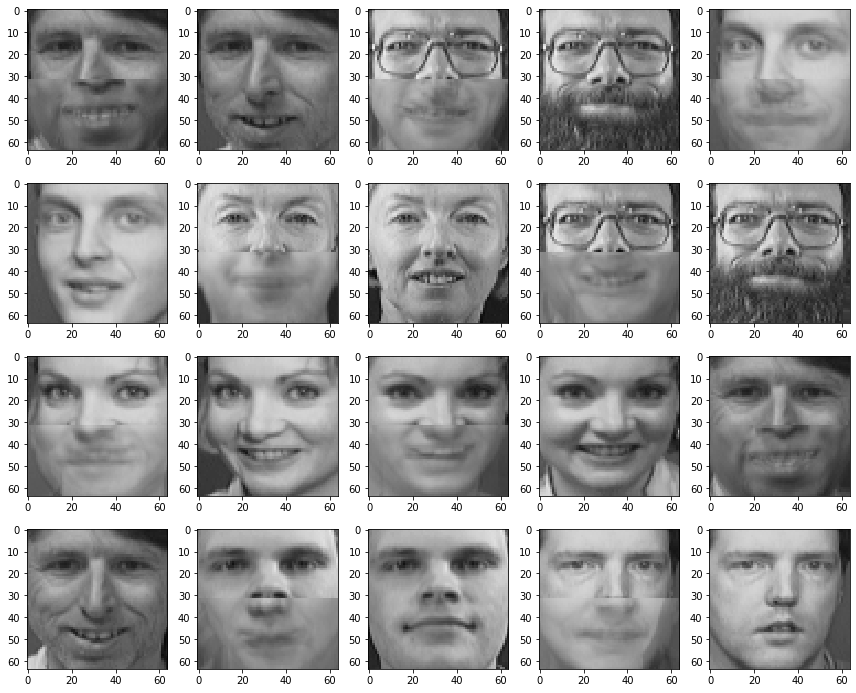

In [24]:
plt.figure(figsize=(12,12))
j = 0
for i in range(pics):
    actual_face =    test_imgs[i].reshape(image_shape)
    completed_face = np.hstack((X_test[i], y_test_predict['KNN'][i]))
    j = j+1
    plt.subplot(5,5,j)
    x = completed_face.reshape(image_shape)
    imshow(x)
    j = j+1
    plt.subplot(5,5,j)
    y = actual_face.reshape(image_shape)
    imshow(y)
  
plt.show()

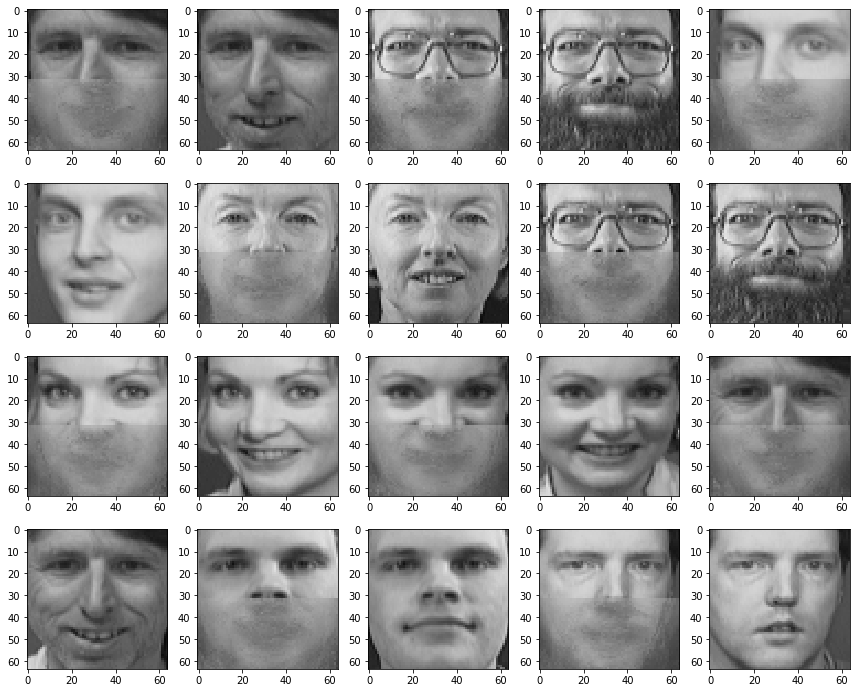

In [25]:
plt.figure(figsize=(12,12))
j = 0
for i in range(pics):
    actual_face =    test_imgs[i].reshape(image_shape)
    completed_face = np.hstack((X_test[i], y_test_predict['Multi_GBM'][i]))
    j = j+1
    plt.subplot(5,5,j)
    x = completed_face.reshape(image_shape)
    imshow(x)
    j = j+1
    plt.subplot(5,5,j)
    y = actual_face.reshape(image_shape)
    imshow(y)
  
plt.show()